# Исследование рынка жилой недвижимости в Москве <a class="anchor" id="0-bullet">

 [1. Загрузка библиотек и данных](#1-bullet)
* [2. Обзор и анализ данных](#2-bullet)
  * [2.1 Обзор](#2.1-bullet)
    * [2.1.1 Количество комнат](#2.1.1-bullet)
    * [2.1.2 Тип](#2.1.2-bullet)
    * [2.1.3 Метро](#2.1.3-bullet)
    * [2.1.4 Адрес](#2.1.4-bullet)
    * [2.1.5 Площадь, м2](#2.1.5-bullet)
    * [2.1.6 Дом](#2.1.6-bullet)
    * [2.1.7 Дом](#2.1.7-bullet)
    * [2.1.8 Телефоны](#2.1.8-bullet)
    * [2.1.9 Ремонт](#2.1.9-bullet)
    * [2.1.10 Балкон](#2.1.10-bullet)
    * [2.1.11 Окна](#2.1.11-bullet)
    * [2.1.12 Санузел](#2.1.12-bullet)
    * [2.1.13 Мусоропровод](#2.1.13-bullet)
    * [2.1.14 Можно с детьми/животными](#2.1.14-bullet)
    * [2.1.15 Дополнительно](#2.1.15-bullet)
    * [2.1.16 Лифт](#2.1.16-bullet)
    * [2.1.17 Название ЖК](#2.1.17-bullet)
    * [2.1.18 Высота потолков, м](#2.1.18-bullet)
    * [2.1.19 Ссылка на объявление](#2.1.19-bullet)
    * [2.1.20 Серия дома](#2.1.20-bullet)
    * [2.1.21 Парковка](#2.1.21-bullet)
    * [2.1.22 Площадь комнат, м2](#2.1.22-bullet)
    * [2.1.23 Описание](#2.1.23-bullet)
 
    
  

## 1. Загрузка библиотек и данных <a class="anchor" id="1-bullet"></a>
[назад к оглавлению](#0-bullet)

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import re

sns.set(style="darkgrid")

%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('_data.csv', index_col = [0])

## 2. Обзор и анализ данных<a class="anchor" id="2-bullet"></a>
[назад к оглавлению](#0-bullet)

### 2.1 Обзор данных<a class="anchor" id="2.1-bullet"></a>

In [3]:
df.head(3)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086


Полученный датасет представляет из себя таблицу, включающую 23368 строк и 24 столбца.

* **'ID  объявления'** - уникальный идентификатор объявления
* **'Количество комнат'** - количество комнат в предлагаемом помещении
* **'Тип'** - тип помещения
* **'Метро'** - название ближайщего метро и время пути до него (опционально)
* **'Адрес'** - адрес предлагаемого помещения в виде: город, улица, дом
* **'Площадь, м2'** - общая площадь помещения и дополнительные параметры (опционально)
* **'Дом'** - этажность дома и тип постройки дома (опционально)
* **'Парковка'** - тип имеющейся парковки
* **'Цена'** - совокупность ценовых параметров
* **'Телефоны'** - номера телеофнов для связи
* **'Описание'** - краткое описание предоставляемых помещений
* **'Ремонт'** - тип ремонта
* **'Площадь комнат, м2'** - данные по площади всех желых помещний
* **'Балкон'** - тип и количество балконов
* **'Окна'** - описание, куда выходят окна
* **'Санузел'** - тип и количество санузлов
* **'Можно с детьми/животными'** - возможность заселения с детьми и/или с животными 
* **'Дополнительно'** - описание присутсвующей мебели и/или техники
* **'Название ЖК'** - название жилищного комплекса
* **'Серия дома'** - тип серии дома
* **'Высота потолков, м'** - высота потолка в метрах
* **'Лифт'** - тип и количество лифтов 
* **'Мусоропровод'** - наличие муоропровода
* **'Ссылка на объявление'** - уникальная ссылка на предоставляемое помещение

Все признаки представлены в виде типа объект, кроме ID объявления (int) и высоты потолков (float).

In [4]:
stat = pd.concat([df.nunique(),df.isnull().sum()], axis =1).reset_index()
stat.rename(columns = {'index':'Параметр', 0:'Кол-во уникальных значений', 1:'Кол-во пропусков'}, inplace = True)
stat

,Параметр,Кол-во уникальных значений,Кол-во пропусков
0,ID объявления,23368,0
1,Количество комнат,24,1041
2,Тип,1,0
3,Метро,5866,1315
4,Адрес,12850,0
5,"Площадь, м2",11255,0
6,Дом,2565,0
7,Парковка,5,13417
8,Цена,3922,0
9,Телефоны,13172,0


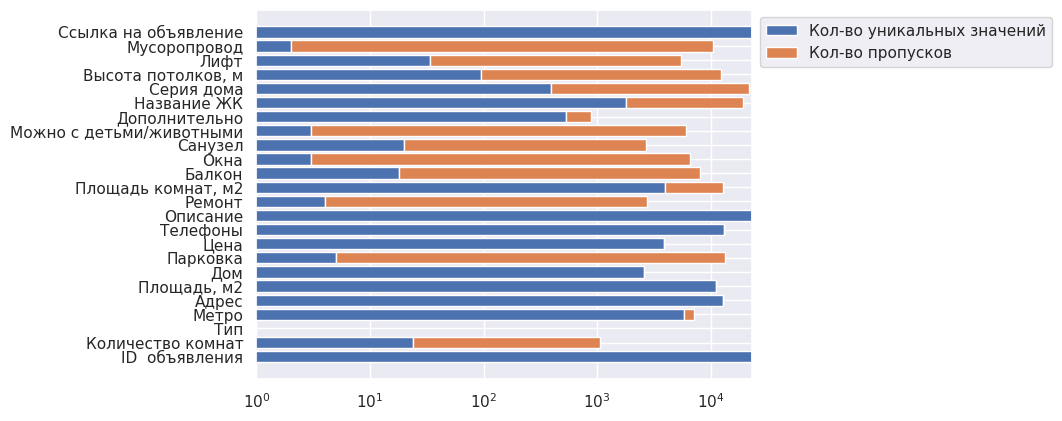

In [5]:
stat.set_index('Параметр', inplace = True)
p1 = plt.barh(y = stat.index, width = stat['Кол-во уникальных значений'])
p2 = plt.barh(y = stat.index, width = stat['Кол-во пропусков'], left=stat['Кол-во уникальных значений'])
plt.legend(stat.columns.tolist(), bbox_to_anchor=(1, 1), loc="upper left")
plt.xscale('log')
plt.show()

Выводы из таблицы:

1. тип никак не влияет (уникальное одно значение, которое встречается во всех объектах - квартира)
2. почти половина адресов не уникальны (поскольку не учитываются № квартир), но используя другие атрибуты (например, номера телефонов, площадь и т.п) можно убрать дубликаты, если таковые присутсвуют
3. присутсвуют легко разбиваемые категории: парковка, ремонт, окна, можно с детьми/животными, мусоропровод, лифт
4. Признаки: ссылка на объявление и ID объявления являются уникальными идентификаторами, которые никак не влияют на переменные

#### 2.1.1 Количество комнат <a class="anchor" id="2.1.1-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут! 24 уникальных значения, включчающие информацию о количестве комнат (от 1 до 6) и, опционально, информацию о планировке (смежная, изолированная, оба варианта). Менее 5% пропущенных значений.

Предложение: разделить колонки на численные значения и планировку (заполнить недостающие значения планировки): 
* заменить "оба варианта" на "смежная";
* 1,2 комнатные "изолированная" (смежные 2к квартиры -редкость); 
* 3 и больше комнат - "смежная".(предполагаем, что как минимум 2 комнаты в большой квартире смежные) 

In [6]:
df['Количество комнат'].value_counts(dropna=False)

1                   7917
2, Изолированная    4623
2                   2591
3                   1717
3, Изолированная    1583
NaN                 1041
3, Оба варианта      875
4                    674
2, Смежная           637
2, Оба варианта      615
4, Оба варианта      253
5                    235
4, Изолированная     223
6                     87
3, Смежная            87
5, Оба варианта       81
5, Изолированная      47
6, Оба варианта       31
6, Изолированная      17
4, Смежная            13
1, Изолированная       8
1, Оба варианта        4
5, Смежная             4
6, Смежная             3
1, Смежная             2
Name: Количество комнат, dtype: int64

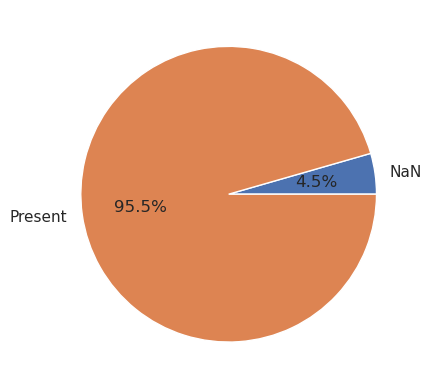

In [7]:
null_sum = df['Количество комнат'].isnull().sum()
plt.pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present'], autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.2 Тип <a class="anchor" id="2.1.2-bullet"></a>
[назад к оглавлению](#0-bullet)

Как было сказано ранее, параметр неинформативный и не имеет влияния на переменную. Данный атрибут предлагает удалить

#### 2.1.3 Метро <a class="anchor" id="2.1.3-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут, особенно актуальный для людей без личного транспорта.
Отсутсвует порядка 5,5% данных.

Предложения: разделить колонку на три значащих (название метро, расстояние в минутах, способ: пешком/машина)

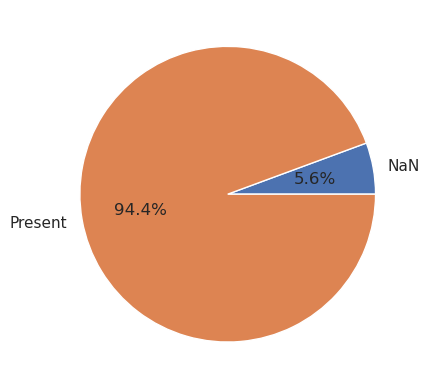

In [8]:
null_sum = df['Метро'].isnull().sum()
plt.pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present'], autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.4 Адрес <a class="anchor" id="2.1.4-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут без пропусков!
Имеет влияние на множество других параметров, что в дальнейшем в совокупности с другими атрибутами может позволить заполнить недостающие показатели в других параметрах

Предложение: 
1. Удалить все объявления, не связанные с г.Москва (см. ниже)
2. Разделить адрес на название, тип улицы(проезд, проспект,улица..),номер дома.

In [9]:
cities = set()
for adress in df['Адрес']:
    cities.add(adress.split(',')[0])
    
cities

{'Краснодарский край', 'Москва', 'Санкт-Петербург'}

#### 2.1.5 Площадь, м2 <a class="anchor" id="2.1.5-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут без пропусков!
11255 уникальных сочетаний из 23368 объявлений. 

Предложение: 
1. брать только "числитель" из многоступенчатой дроби значений, обозначающий общую площадт квартиры. Это позволит лучше сгруппировать признак. Остальное-удалить

In [10]:
df['Площадь, м2'].unique()

array(['200.0/20.0', '198.0/95.0/18.0', '200.0/116.0/4.0', ..., '43.1',
       '52.5/10.0', '90.0/48.2/15.5'], dtype=object)

#### 2.1.6 Дом <a class="anchor" id="2.1.6-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут без пропусков! 2565 сочетаний из 23368 значений.

Предложения: 
1. Разделить на три колонки: этаж, этажность, тип(кирпичный,монолитный,блочный)

In [11]:
df['Дом'].value_counts(dropna=False)

3/5, Кирпичный               322
4/5, Кирпичный               296
2/5, Кирпичный               255
1/5, Кирпичный               232
5/5, Кирпичный               231
                            ... 
19/35, Монолитный              1
8/35, Монолитно-кирпичный      1
12/49, Монолитный              1
13/34, Монолитный              1
12/25, Блочный                 1
Name: Дом, Length: 2565, dtype: int64

#### 2.1.7 Цена <a class="anchor" id="2.1.7-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут без пропусков! 3922 сочетаний из 23368 значений.

Имеет множество параметров (стоимость аренды, ком. платежи, залог, срок аренды, предоплата и т.п.)

Предложения:
1. разбить все параметры на колонки
2. колонки "ком. платежи" и "предоплата" сделать категориальными (есть/нет)

In [12]:
df['Цена'][1234]

'39000.0 руб./ За месяц, Сумма коммунальных платежей - 8700.0 руб., Залог - 39000 руб., Срок аренды - Длительный, Предоплата 1 мес'

#### 2.1.8 Телефоны <a class="anchor" id="2.1.8-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут без пропусков! 13172	уникальных значений из 23368 значений, однако высокая уникальность за счет наличия в некоторых строках по 2 номера (см.ниже). В совокупности с другими атрибутами, может стать инструментом для определения дубликатов в сете. 

Предложения:
1. два номера развести на разные столбцы, поскольку возможно, что вторые номера относятся к риелторам (чье наличие в сделке имеет денежную подоплеку) 

In [13]:
phones = []
for phone in df['Телефоны']:
    phones.append(len(phone.split(',')))
print(set(phones))

{1, 2}


#### 2.1.9 Ремонт <a class="anchor" id="2.1.9-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут! Имеется 12% пропусков. 4 уникальных параметра позволяет сразу разделить на категории

Предложения:
1. Ремонт, как правило, играет важную роль в стоимости. Можно заполнить пропуски за счет группировки с этим параметром. Дополнительным атрибутом группировки может быть название ЖК

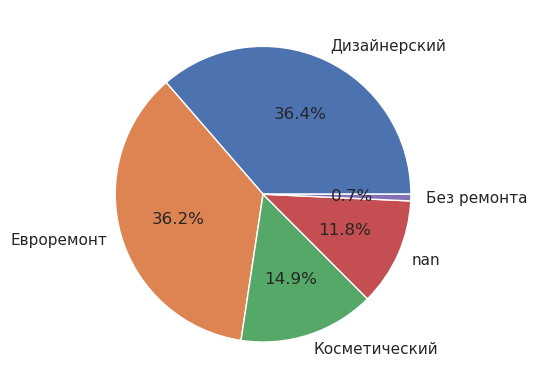

In [14]:
labels = df['Ремонт'].unique()
sizes = df['Ремонт'].value_counts(dropna=False)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.10 Балкон <a class="anchor" id="2.1.10-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут! Имеется 34% пропусков. 
18 уникальных значений на самом деле являются вариациями типа балкона (балкон/лоджия) и их количеством. 

Предложения: 
1. разделить на два типа с количеством того или иного типа
2. заполнение пропусков: через близкие по площади квартиры (допущение: близкие площади = близкая планировка), находящиеся в одном доме / через серию дома (сомнительный варинт, поскольку данных нет у большого количества объектов)

In [15]:
df['Балкон'].value_counts(dropna=False)

NaN                       7978
Балкон (1)                7428
Лоджия (1)                6007
Балкон (1), Лоджия (1)     716
Лоджия (2)                 568
Балкон (2)                 474
Балкон (3)                  55
Лоджия (3)                  45
Балкон (2), Лоджия (2)      25
Балкон (1), Лоджия (2)      24
Балкон (2), Лоджия (1)      20
Балкон (4)                   6
Балкон (1), Лоджия (3)       5
Лоджия (4)                   5
Балкон (3), Лоджия (1)       5
Балкон (2), Лоджия (3)       3
Балкон (1), Лоджия (4)       2
Балкон (3), Лоджия (3)       1
Балкон (4), Лоджия (4)       1
Name: Балкон, dtype: int64

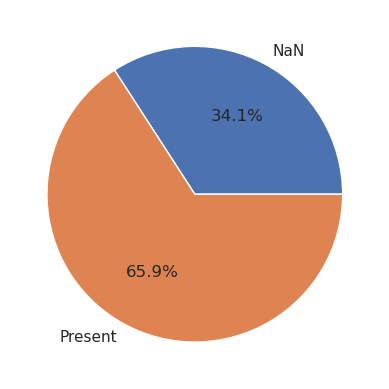

In [16]:
null_sum = df['Балкон'].isnull().sum()
plt.pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present'], autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.11 Окна <a class="anchor" id="2.1.11-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут! Имеется 46,5% пропусков. 3 уникальных параметра позволяет сразу разделить на категории

Предложения:
1. заполенение пропусков через близкие по площади квартиры в одном доме (площадь - планировка)
2. Параметр может играть существенную роль именно для Москвы 

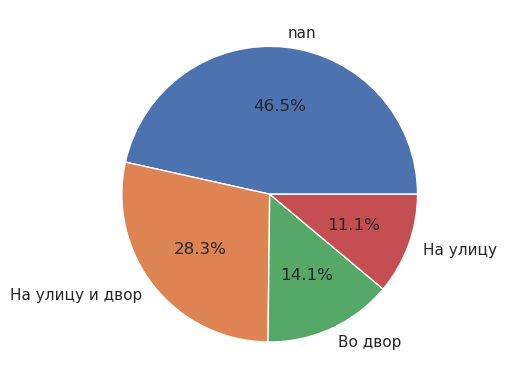

In [17]:
labels = df['Окна'].unique()
sizes = df['Окна'].value_counts(dropna=False)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.12 Санузел <a class="anchor" id="2.1.12-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут! Имеется 11,4% пропусков. 20 уникальных значений на самом деле являются вариациями размещения санузла (совмещенный/раздельный) и их количеством.

Предложения:

1. разделить на два типа с количеством того или иного типа
2. заполнение пропусков: через близкие по площади квартиры (допущение: близкие площади = близкая планировка), находящиеся в одном доме / через серию дома (сомнительный варинт, поскольку данных нет у большого количества объектов)

In [18]:
df['Санузел'].value_counts(dropna=False)

Совмещенный (1)                    10078
Раздельный (1)                      7158
NaN                                 2672
Совмещенный (2)                     1437
Совмещенный (1), Раздельный (1)      812
Раздельный (2)                       534
Совмещенный (3)                      241
Совмещенный (2), Раздельный (1)      188
Совмещенный (4)                       77
Раздельный (3)                        52
Совмещенный (1), Раздельный (2)       30
Совмещенный (3), Раздельный (1)       27
Совмещенный (2), Раздельный (2)       25
Раздельный (4)                        15
Совмещенный (3), Раздельный (3)        6
Совмещенный (4), Раздельный (1)        6
Совмещенный (4), Раздельный (2)        4
Совмещенный (1), Раздельный (3)        2
Совмещенный (2), Раздельный (3)        2
Совмещенный (2), Раздельный (4)        1
Совмещенный (3), Раздельный (2)        1
Name: Санузел, dtype: int64

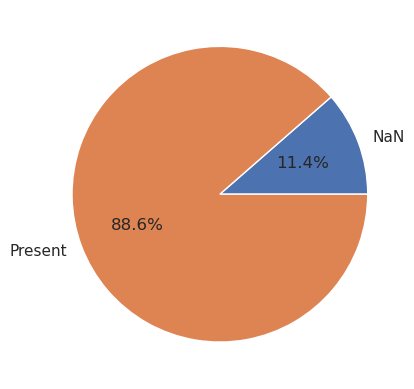

In [19]:
null_sum = df['Санузел'].isnull().sum()
plt.pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present'], autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.13 Мусоропровод <a class="anchor" id="2.1.13-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут! Имеется 45% пропусков. 2 уникальных параметра позволяет сразу разделить на категории

Предложения:
1. заполнение производить по адресам домов

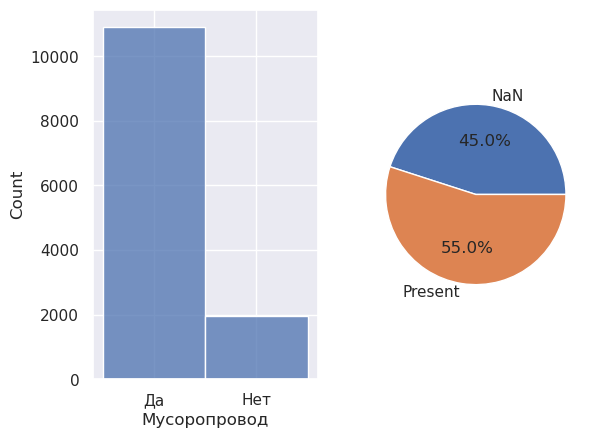

In [20]:
fig, axes = plt.subplots(1, 2)

sns.histplot(data = df['Мусоропровод'], ax=axes[0])
plt.xticks(rotation = 90)

null_sum = df['Мусоропровод'].isnull().sum()
plt.pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present'], autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.14 Можно с детьми/животными <a class="anchor" id="2.1.14-bullet"></a>
[назад к оглавлению](#0-bullet)

Важный атрибут для семей, но менее важен для студентов! Имеется 26% пропусков. 2 уникальных параметра (можно и с детьми, и с животными нет смысла выделять в уникальный атрибут) позволяет сразу разделить на категории

Предложения:
1. часто данная характеристика имеет зависимость от наличия и типа ремонта. Однако, есть вероятность ложной корреляции, поэтому вторым вариантом заполнения являются 0

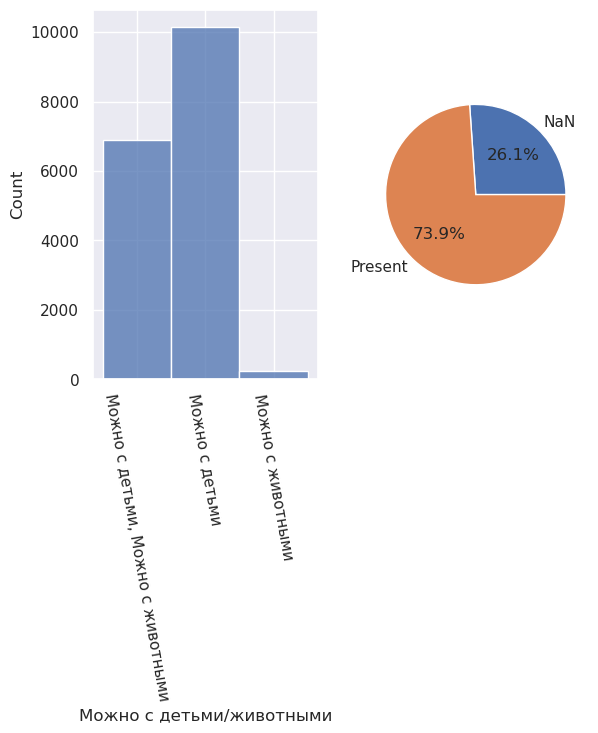

In [21]:
fig, axes = plt.subplots(1, 2)

sns.histplot(data = df['Можно с детьми/животными'], ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation = -80)

null_sum = df['Можно с детьми/животными'].isnull().sum()
axes[1].pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present'], autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.15 Дополнительно <a class="anchor" id="2.1.15-bullet"></a>
[назад к оглавлению](#0-bullet)

Атрибут с потенциалом. Включает в себя 11 параметров, которые в будущем можно выделить как отдельные признаки. 
1,5% пропущенных данных можно будет записать как 0.

Предложения:
1. Сгруппировать на 2 большие подгруппы (мебель и техника с разбросом от 0 до 1 в зависимости от количества пунктов)
2. В отдельные параметры выделить "вещи первой необходимости" (интернет, стиральная машина, холодильник) 

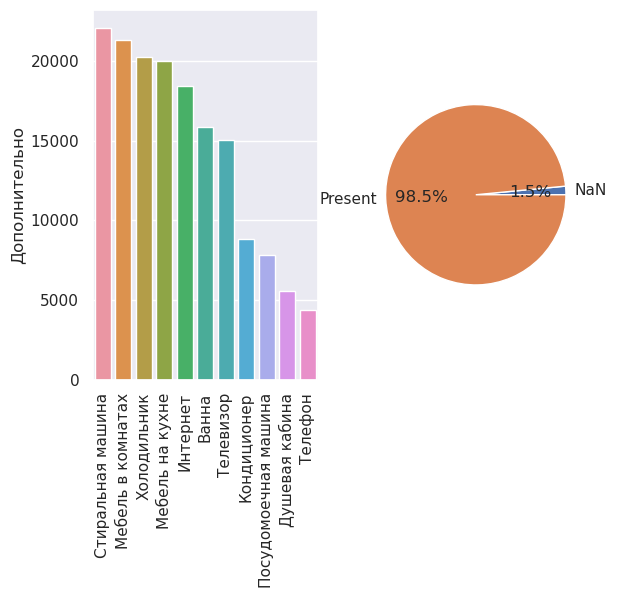

In [22]:
add = df['Дополнительно'].apply(lambda x: x.split(', ') if x == x else x).explode().value_counts()
add = pd.DataFrame(add)

fig, axes = plt.subplots(1, 2)

sns.barplot(data = add, x = add.index.tolist(), y = 'Дополнительно', ax = axes[0])
plt.sca(axes[0])
plt.xticks(rotation = 'vertical')

null_sum = df['Дополнительно'].isnull().sum()
axes[1].pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present'], autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.16 Лифт <a class="anchor" id="2.1.16-bullet"></a>
[назад к оглавлению](#0-bullet)

Атрибут с 2 уникальными значениями (пассажирский и грузовой) с дополнительной вариативностью по их количеству. почти 24% неизвестных значений

Предложения:
1. заполнение пустых значений можно произвести через адрес дома
2. Поскольку количество и тип зависит от этажности, то также в зависимости от этого параметра можно заполнить [данные](https://www.bn.ru/gazeta/articles/263893/#:~:text=%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%BA%D0%BE%20%D0%BB%D0%B8%D1%84%D1%82%D0%BE%D0%B2%20%D0%B4%D0%BE%D0%BB%D0%B6%D0%BD%D0%BE%20%D0%B1%D1%8B%D1%82%D1%8C%20%D0%B2,%2D%D1%8D%D1%82%D0%B0%D0%B6%D0%BA%D0%B0%D1%85%20%E2%80%93%20%D1%82%D1%80%D0%B8%20%D0%B8%D0%BB%D0%B8%20%D1%87%D0%B5%D1%82%D1%8B%D1%80%D0%B5.)
*Сколько лифтов должно быть в жилом доме, зависит от его этажности. Если в здании до пяти этажей – можно обойтись и без подъемника. В доме до девяти этажей достаточно расположить одну шахту в подъезде. В высотках, имеющих от 10 до 19 этажей, должно быть минимум два лифта, в 20–25-этажках – три или четыре.*

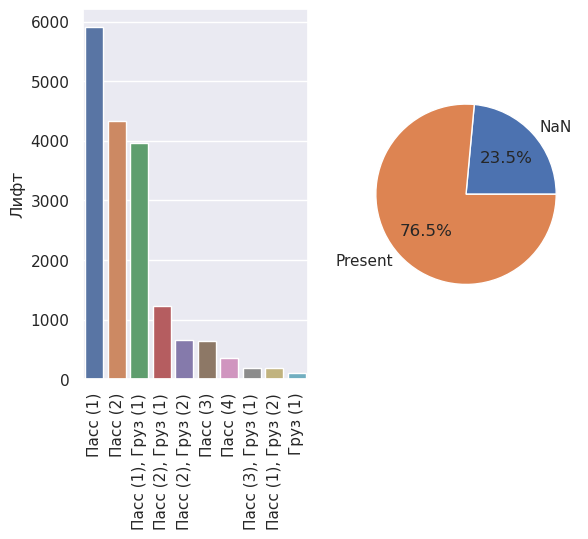

In [23]:
lift = df['Лифт'].value_counts()
null_sum = df['Лифт'].isnull().sum()
lift = pd.DataFrame(lift)[:10]

fig, axes = plt.subplots(1, 2)

sns.barplot(data = lift, x = lift.index.tolist(), y = 'Лифт', ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation = 'vertical')


axes[1].pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present'], autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.17 Название ЖК <a class="anchor" id="2.1.17-bullet"></a>
[назад к оглавлению](#0-bullet)

Атрибут с большим количеством пропущенных значений! 
Имеет косвенное влияние на некоторые признаки, однако из-за невысокой информативности, сложно будет использовать в заполнении. 

Предложения:
1. попробовать заполнить недостающие данные по общим адресам домов 

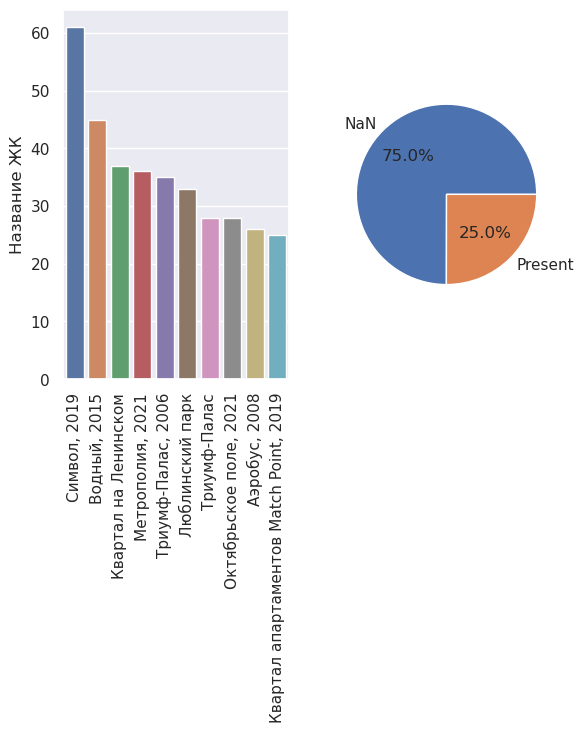

In [24]:
jk = df['Название ЖК'].value_counts()
jk = pd.DataFrame(jk)[:10]

fig, axes = plt.subplots(1, 2)

sns.barplot(data = jk, x = jk.index, y = 'Название ЖК', ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation = 'vertical')

null_sum = df['Название ЖК'].isnull().sum()
axes[1].pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present'],
            autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.18 Высота потолков, м <a class="anchor" id="2.1.18-bullet"></a>
[назад к оглавлению](#0-bullet)

Для высоты потолков данных нет для половины объявлений. Также присутствуют ошибочные вводы в которых высота потолков превышает 4 метра и доходит до десятков, сотен и тысяч. 

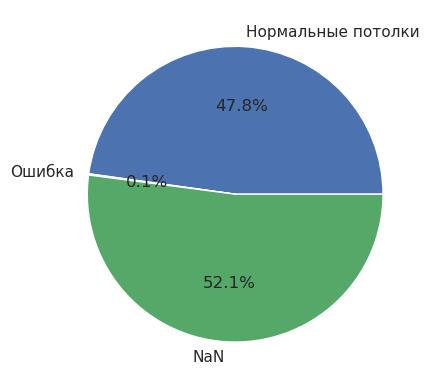

In [25]:
true_ceil = df['Высота потолков, м'][df['Высота потолков, м'] < 5]
false_ceil = df['Высота потолков, м'][df['Высота потолков, м'] > 5]
nan = df['Высота потолков, м'].isnull().sum()

values = [len(true_ceil), len(false_ceil), nan]

plt.pie(x = values, labels = ["Нормальные потолки", "Ошибка", "NaN"], autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.19 Ссылка на объявление <a class="anchor" id="2.1.19-bullet"></a>
[назад к оглавлению](#0-bullet)

Уникальный номер в конце каждой ссылки на объявление не повторяется - все объявления формально разные. Данный атрибут не влияет на переменную.

In [26]:
df['Ссылка на объявление'].apply(lambda x: ''.join(re.findall('\d+', x))).nunique() == df.shape[0]

True

#### 2.1.20 Серия дома <a class="anchor" id="2.1.20-bullet"></a>
[назад к оглавлению](#0-bullet)

Атрибут с более чем 90% пропущенных значений. Возможно аналогичные заполнения, как с параметром "Название ЖК".

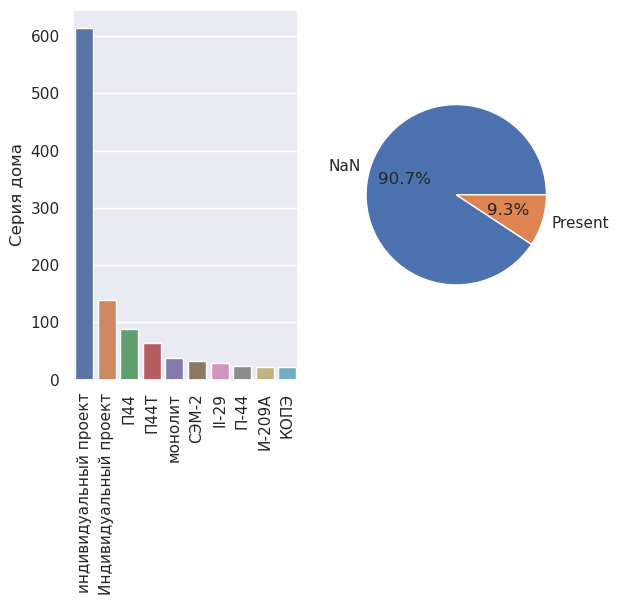

In [27]:
sd = pd.DataFrame(df['Серия дома'].value_counts())[:10]

fig, axes = plt.subplots(1, 2)

sns.barplot(data = sd, x = sd.index.tolist(), y = 'Серия дома', ax = axes[0])
plt.sca(axes[0])
plt.xticks(rotation = 'vertical')

null_sum = df['Серия дома'].isnull().sum()
axes[1].pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present']
            , autopct='%1.1f%%', pctdistance=0.6);

При этом более половины всех обозначенных серий относятся к индивидуальным проектам 

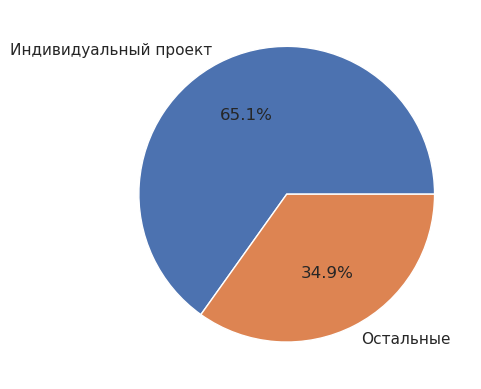

In [28]:
all = df['Серия дома'].value_counts().sum()
ind = sd[:2].sum()

plt.pie([int(all) - int(ind), int(ind)], labels = ['Индивидуальный проект', 'Остальные'], 
        autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.21 Парковка <a class="anchor" id="2.1.21-bullet"></a>
[назад к оглавлению](#0-bullet)

Актуальный атрибут для владельцев машины (т.е. в большинстве своем не для студентов). Поти 60% отсутсвующих данных.

Предложения:
1. заполнить за пропуски для одинаковых адресов. 
2. две категории: есть (1) или нет (0) парковка

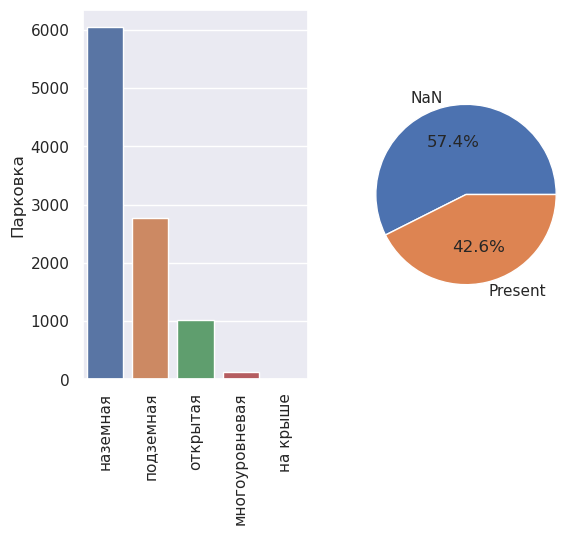

In [29]:
park = pd.DataFrame(df['Парковка'].value_counts())

fig, axes = plt.subplots(1, 2)

sns.barplot(data = park, x = park.index, y = 'Парковка', ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation = 'vertical')

null_sum = df['Парковка'].isnull().sum()
axes[1].pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present']
            , autopct='%1.1f%%', pctdistance=0.6);

#### 2.1.22 Площадь комнат, м2 <a class="anchor" id="2.1.22-bullet"></a>
[назад к оглавлению](#0-bullet)

Атрибут, связанный с общей площадью квартир. Отсутсвует почти 40% данных.
Предложение: пока нет представления, как можно использовать данные, однако как вариант, можно высчитать общую жилую площадь и использовать как отдельный параметр

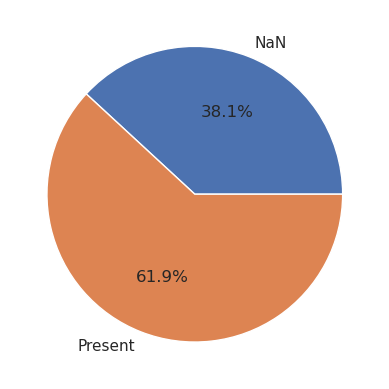

In [30]:
null_sum = df['Площадь комнат, м2'].isnull().sum()
plt.pie([null_sum, (df.shape[0] - null_sum)], labels = ['NaN', 'Present']
            , autopct='%1.1f%%', pctdistance=0.6);


#### 2.1.23 Описание<a class="anchor" id="2.1.23-bullet"></a>
[назад к оглавлению](#0-bullet)

Атрибут с дополнительными параметрами для увеличения цены.
Предложения: 
1. поиск по ключевым словам наиболее значимых параметров (риелторы, агенты, возможность торга и т.п.)
2. Из 23368 объектов 23078 являются уникальными. 290 объектов возможно являются дубликатами, которые можно будет удалить

In [31]:
len(df) - df['Описание'].nunique()

290

In [32]:
df['Описание'][23356]

'Рады приветствовать вас,дорогие читатели. Квартира в отличном состоянии,свежая,светлая. Один собственник. Соседи хорошие,тихие. Все детали видны на фото. Двор прекрасный,для семьи с детьми самое то. Прям у подъезда аптека,гастроном,так же есть отличное место для детей,где можно посмотреть на множество разновидностей красивых рыбок,так же у подъезда. Остановка автобусная прям у дома. До метро две остановки или 10-13 минут пешком. Подробности при просмотре. Ждем вашим звонков и смс., 13 фото'